<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/Bitcoin_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests
!pip install pandas
!pip install numpy

In [2]:
import requests
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import drive, files
drive.mount('/content/drive')
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cycles = []
urls = []
from datetime import datetime  
from datetime import timedelta  

timer = datetime.date(datetime(year=2020, month=5, day=3)) 

for i in range(1):
 timer = timer + timedelta(days=1)
 #cycles.append(timer)
 print(timer)
 urls.append('https://rest.coinapi.io/v1/ohlcv/BTC/USD/history?period_id=1DAY&time_start={}T00:00:00'.format(timer))

2020-05-04


In [ ]:
cycles

[]

In [ ]:
urls

In [ ]:
apikey = ''
datas = []
headers = {
    'X-CoinAPI-Key': apikey
}
for url in urls:
 response = requests.get(url, headers=headers).json()
 datas.append(response)

In [ ]:
datas[89]

[{'price_close': 11810.07,
  'price_high': 11894.73,
  'price_low': 11228.0,
  'price_open': 11351.61,
  'time_close': '2020-08-01T23:59:59.9607290Z',
  'time_open': '2020-08-01T00:00:00.2127820Z',
  'time_period_end': '2020-08-02T00:00:00.0000000Z',
  'time_period_start': '2020-08-01T00:00:00.0000000Z',
  'trades_count': 238735,
  'volume_traded': 38179.618191884},
 {'price_close': 11173.92,
  'price_high': 12134.29,
  'price_low': 10546.15,
  'price_open': 11810.07,
  'time_close': '2020-08-02T22:30:11.3495050Z',
  'time_open': '2020-08-02T00:00:00.1568830Z',
  'time_period_end': '2020-08-03T00:00:00.0000000Z',
  'time_period_start': '2020-08-02T00:00:00.0000000Z',
  'trades_count': 252856,
  'volume_traded': 51680.403142733}]

In [ ]:
start_date = []
price_open = []
price_close = []
price_high = []
price_low = []
trades_count = []
volume_traded = []

for request in datas:
  for day in request:
    for key, value in day.items():
     if key == 'time_period_start':
       start_date.append(value.split('T')[0])
     elif key == 'price_open':
       price_open.append(value)
     elif key == 'price_close':
       price_close.append(value)
     elif key == 'price_high':
       price_high.append(value)
     elif key == 'price_low':
       price_low.append(value)
     elif key == 'trades_count':
       trades_count.append(value)
     if key == 'volume_traded':
       volume_traded.append(value)          

In [ ]:
data = pd.DataFrame()

data['Date'] = start_date
data['Open'] = price_open
data['High'] = price_high
data['Low'] = price_low
data['Close'] = price_close
data['Volume'] = volume_traded

In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
data.drop(axis=1, columns='index', inplace=True)

KeyError: ignored

In [ ]:
data.to_csv('btc_data_end.csv')

In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks/Linear\ Regression\ SKlearn/Real\ Examples/Webscraper/
#data.to_csv('drive/My Drive/Colab Notebooks/Linear Regression SKlearn/Real Examples/Webscraper/BacklinkCheck.csv')
from openpyxl import *

import time
timer = time.strftime('%c')

#file.save('Crypto Data {}.csv'.format(timer))
data.to_csv('drive/My Drive/Colab Notebooks/Cryptos/Crypto Data/Bitcoin_Historic {}.csv'.format(timer))

'BacklinkCheckFri 02:22:11.csv'     'CoinbaseScrapeSun 01:19:29.csv'
'BacklinkCheckFri 02:22:11.gsheet'  'CoinbaseScrapeSun 01:23:13.gsheet'
'BacklinkCheckFri 02:26:36.csv'      FirstCrypto.csv
 BacklinkCheck.gsheet		     FirstCrypto.gsheet
'BacklinkCheckThu 23:08:35.csv'      UrlSamples.gsheet
'BacklinkCheckThu 23:11:08.csv'      Webscraper2.21.2020.ipynb
'BacklinkCheckThu 23:14:58.csv'      Webscraper_V0.2.ipynb
'BacklinkCheckThu 23:25:13.csv'      Webscraper_V0.4.ipynb
 BacklinkScraperV0.1.ipynb


#If data is already pre-compiled


In [56]:
btc_data = pd.read_csv('BTC_08-13.csv')
xlm_data = pd.read_csv('Stellar Lumens XLM - Sheet1.csv')

In [57]:
btc_data

,Date,Open,High,Low,Close,Volume
0,4/28/2013,135.30,135.98,132.10,134.21,0.000000e+00
1,4/29/2013,134.44,147.49,134.00,144.54,0.000000e+00
2,4/30/2013,144.00,146.93,134.05,139.00,0.000000e+00
3,5/1/2013,139.00,139.89,107.72,116.99,0.000000e+00
4,5/2/2013,116.38,125.60,92.28,105.21,0.000000e+00
...,...,...,...,...,...,...
2659,8/8/2020,11604.55,11800.06,11558.43,11754.05,1.757206e+10
2660,8/9/2020,11737.33,11806.06,11548.78,11675.74,1.748961e+10
2661,8/10/2020,11662.26,12045.14,11662.26,11878.11,2.611411e+10
2662,8/11/2020,11881.65,11932.71,11195.71,11410.53,2.703978e+10


#BTC Chart, skip these sections corresponding to each crypto


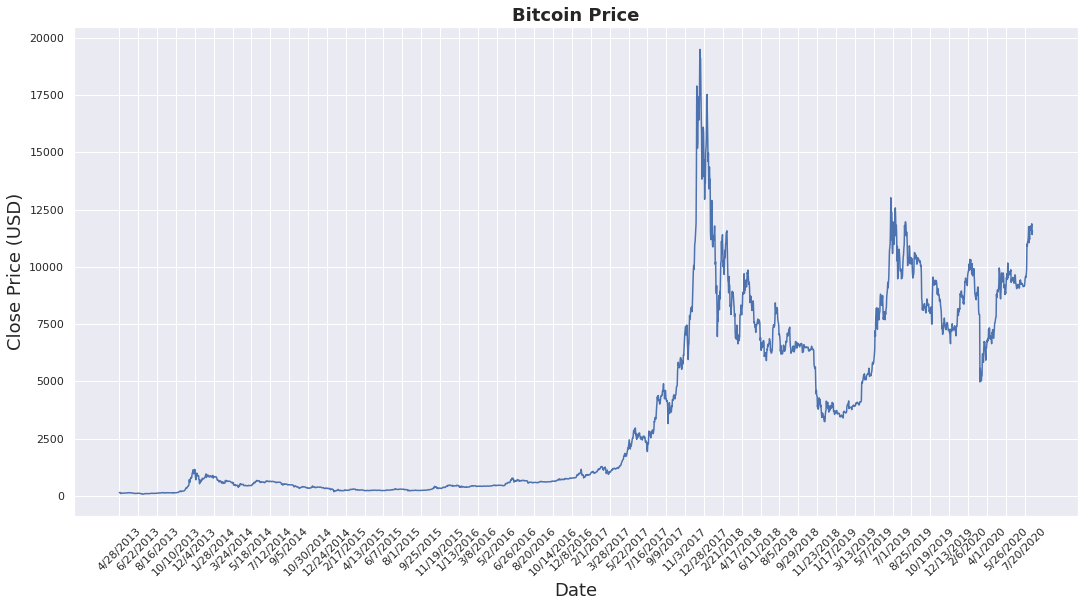

In [58]:
price = btc_data[['Close']]
plt.figure(figsize = (18,9))
plt.plot(price)
plt.xticks(range(0, btc_data.shape[0],55), btc_data['Date'].loc[::55],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

#XLM

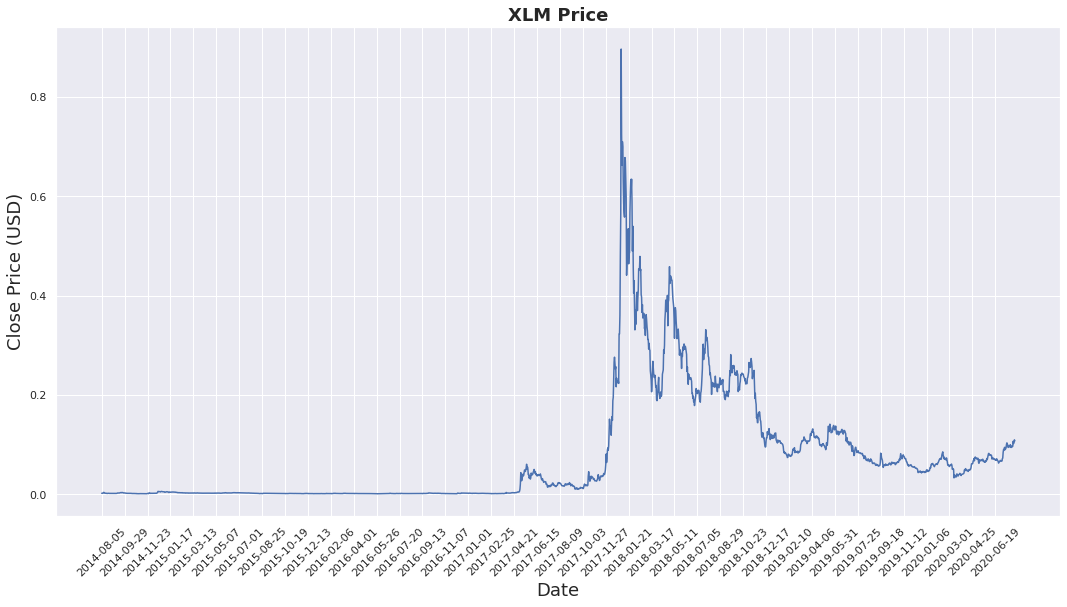

In [5]:
xlm_price = xlm_data[['Close']]

plt.figure(figsize = (18,9))
plt.plot(xlm_price)
plt.xticks(range(0, xlm_data.shape[0],55), xlm_data['Date'].loc[::55],rotation=45)
plt.title("XLM Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [6]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2642 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


In [17]:
recent_price = pd.DataFrame(btc_data['Close'][-6::])

In [18]:
price.tail()

,Close
2637,11110.12
2638,11115.95
2639,11351.62
2640,11810.07
2641,11182.73


In [19]:
recent_price

,Close
2636,10934.00
2637,11110.12
2638,11115.95
2639,11351.62
2640,11810.07
2641,11182.73


In [ ]:
type(price)

pandas.core.frame.DataFrame

In [68]:
del model

In [69]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

norm_data = min_max_scaler.fit_transform(price.values)
norm_preds = min_max_scaler.fit_transform(recent_price.values)

In [70]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [61]:
len(norm_data)

2664

#The next split for norm_data is relevant to create our train/test

In [71]:
past_history = 5
future_target = 1



x_train, y_train = univariate_data(norm_data,
                                   0,
                                   2113,
                                   past_history,
                                   future_target)

x_test, y_test = univariate_data(norm_data,
                                 2114,
                                 2663,
                                 past_history,
                                 future_target)

pred_test, y_pred = univariate_data(norm_preds, 0, None, past_history, future_target)

In [72]:
x_test

array([[[0.18641029],
        [0.18426093],
        [0.18452342],
        [0.18341888],
        [0.18263706]],

       [[0.18426093],
        [0.18452342],
        [0.18341888],
        [0.18263706],
        [0.18283934]],

       [[0.18452342],
        [0.18341888],
        [0.18263706],
        [0.18283934],
        [0.18330153]],

       ...,

       [[0.57323986],
        [0.60109157],
        [0.60277719],
        [0.59360018],
        [0.6014534 ]],

       [[0.60109157],
        [0.60277719],
        [0.59360018],
        [0.6014534 ],
        [0.59742282]],

       [[0.60277719],
        [0.59360018],
        [0.6014534 ],
        [0.59742282],
        [0.60783871]]])

In [29]:
pred_test

array([], dtype=float64)

In [73]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout

num_units = 80
learning_rate = 0.00001
activation_function = 'sigmoid'
adam = Adam(lr=learning_rate)
loss_function = 'mse'
batch_size = 5
num_epochs = 60

# Initialize the RNN
model = Sequential()
model.add(LSTM(units = num_units, return_sequences=True, input_shape=(None, 1)))
model.add(LSTM(units = num_units, return_sequences=True, input_shape=(None,80)))
model.add(LSTM(units = num_units, activation=activation_function, input_shape=(None,80)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.15))
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer=adam, loss=loss_function)

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, None, 80)          26240     
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 80)          51520     
_________________________________________________________________
lstm_5 (LSTM)                (None, 80)                51520     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 80)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 129,361
Trainable params: 129,361
Non-trainable params: 0
________________________________________________

Epoch 1/60
380/380 [==============================] - 4s 10ms/step - loss: 0.0625 - val_loss: 0.0135
Epoch 2/60
380/380 [==============================] - 3s 7ms/step - loss: 0.0735 - val_loss: 0.0151
Epoch 3/60
380/380 [==============================] - 3s 7ms/step - loss: 0.0655 - val_loss: 0.0165
Epoch 4/60
380/380 [==============================] - 3s 7ms/step - loss: 0.0660 - val_loss: 0.0171
Epoch 5/60
380/380 [==============================] - 3s 7ms/step - loss: 0.0651 - val_loss: 0.0140
Epoch 6/60
380/380 [==============================] - 3s 8ms/step - loss: 0.0632 - val_loss: 0.0129
Epoch 7/60
380/380 [==============================] - 3s 7ms/step - loss: 0.0597 - val_loss: 0.0103
Epoch 8/60
380/380 [==============================] - 3s 7ms/step - loss: 0.0577 - val_loss: 0.0087
Epoch 9/60
380/380 [==============================] - 3s 7ms/step - loss: 0.0550 - val_loss: 0.0068
Epoch 10/60
380/380 [==============================] - 3s 7ms/step - loss: 0.0496 - val_loss: 0.004

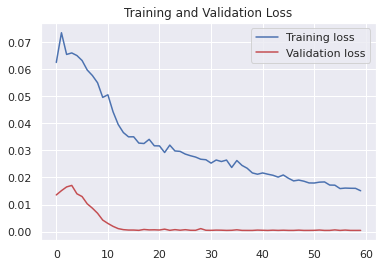

In [75]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=num_epochs,
    shuffle=False
)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

[]

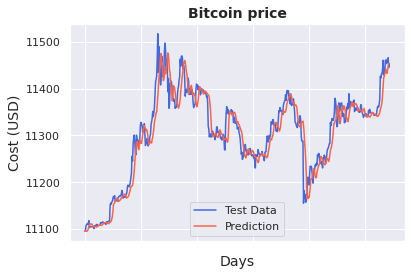

In [76]:
original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predictions = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))

ax = sns.lineplot(x=original.index, y=original[0], label="Test Data", color='royalblue')
ax = sns.lineplot(x=predictions.index, y=predictions[0], label="Prediction", color='tomato')
ax.set_title('Bitcoin price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)

In [77]:
original

,0
0,11094.584975
1,11096.571229
2,11107.477369
3,11108.892321
4,11111.269965
...,...
539,11460.915277
540,11457.384208
541,11466.509256
542,11445.425647


In [78]:
predictions

,0
0,11096.508789
1,11095.610352
2,11095.358398
3,11094.939453
4,11095.383789
...,...
539,11432.968750
540,11439.909180
541,11445.536133
542,11454.755859


In [ ]:
len(x_test)

#The next cell allows us to make a prediction from the final days on the dataset we gather from coinbase or coinmarketcap

In [97]:
ends = original[-7::]
ends_test = min_max_scaler.fit_transform(ends.values)
pred_test, y_pred = univariate_data(ends_test, 0, 6, past_history, future_target)
new_preds = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(pred_test)))

In [98]:
new_preds

,0
0,11459.15918


In [94]:
ends = ends.append(new_preds)

In [95]:
pred_again = ends[-7::]
ends_test = min_max_scaler.fit_transform(pred_again.values)
pred_test, y_pred = univariate_data(ends_test, 0, 6, past_history, future_target)
new_pred_again = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(pred_test)))

In [96]:
new_pred_again

,0
0,11457.305664
